In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Machine Learning Workflow
## 1. Feature engineering
## 2. splitting the data
## 3. Train the model
## 4. assess model performance

In [90]:
dataset = pd.read_csv("C:/Users/jamal/OneDrive/Desktop/datacoach/weather.csv")
dataset.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [91]:
print(dataset.shape)
print('\nThe column names are:')
print(dataset.columns)
print('\nThe data types:')
print(dataset.dtypes)

(2500, 6)

The column names are:
Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')

The data types:
Temperature    float64
Humidity       float64
Wind_Speed     float64
Cloud_Cover    float64
Pressure       float64
Rain            object
dtype: object


In [92]:
dataset.describe()
#rain is object

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [93]:
rain_data = dataset[dataset['Rain'] == 'rain']
no_rain_data = dataset[dataset['Rain'] == 'no rain']
print(rain_data)
print(no_rain_data)


      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  Rain
0       23.720338  89.592641    7.335604    50.501694  1032.378759  rain
3       23.622080  74.367758    7.050551    67.255282   982.632013  rain
9       19.586038  82.978293    5.760537    98.014450  1036.503457  rain
11      23.222373  76.877943   15.825673    72.869790   980.108934  rain
16      10.505460  75.456091   14.797331    99.142331  1011.577194  rain
...           ...        ...         ...          ...          ...   ...
2453    17.827472  82.169130    0.469828    83.246856  1030.180411  rain
2458    11.970059  84.451618    6.833904    97.413056  1025.504426  rain
2473    23.367704  93.753660    7.061520    78.769767  1042.865020  rain
2479    23.963077  86.028469    3.612575    84.842039   997.953417  rain
2481    23.976170  77.144515   16.145567    84.636004  1010.286784  rain

[314 rows x 6 columns]
      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
1       27.879734  46.48

In [94]:
no_rain_data.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000
mean,23.319913,61.455151,9.909297,46.058162,1014.249021
std,7.376748,19.444223,5.760907,28.917962,20.137445
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.920559,45.170085,4.782485,20.260167,996.797572
50%,23.918775,59.481853,9.926077,44.206476,1013.433035
75%,29.796251,77.069360,14.945992,70.984932,1031.589224
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [95]:
rain_data.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,314.000000,314.000000,314.000000,314.000000,314.000000
mean,17.442619,84.480176,9.885073,74.720123,1014.753118
std,4.295249,8.650383,5.923008,14.606900,20.629713
min,10.016605,70.094641,0.033690,50.073046,980.108934
25%,13.425949,76.556641,4.667279,61.537020,997.666829
50%,17.608339,84.276680,9.804165,74.517993,1013.266195
75%,21.046427,92.438051,14.941082,87.921606,1032.345828
max,24.822007,99.995180,19.989565,99.672015,1049.907858


In [1]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rain', y='Cloud_Cover', data=dataset, palette="Set2")
plt.xlabel('Condition (Rain / No Rain)')
plt.ylabel('Cloud Cover')
plt.show()

NameError: name 'plt' is not defined

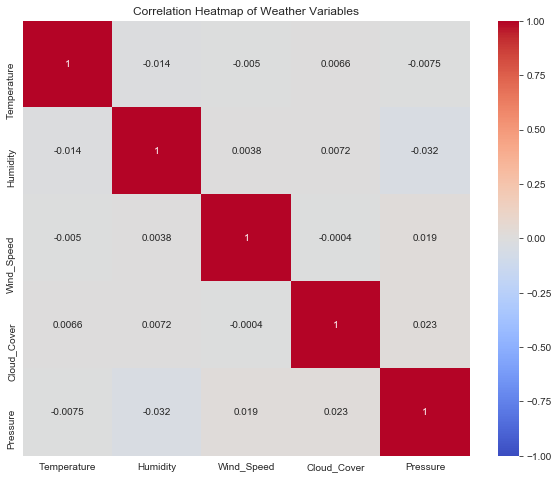

In [97]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Weather Variables')
plt.show()


In [98]:
#1 for rain, 0 for no rain
dataset['Rain_Numeric'] = dataset['Rain'].apply(lambda x: 1 if x == 'rain' else 0)

# Calculate correlations between 'Rain_Numeric' and other numerical columns
rain_correlations = dataset.corr()['Rain_Numeric'].drop('Rain_Numeric')

# Display the result
print(rain_correlations)


Temperature   -0.265882
Humidity       0.382464
Wind_Speed    -0.001389
Cloud_Cover    0.326216
Pressure       0.008273
Name: Rain_Numeric, dtype: float64


In [99]:
#dropping pressure and wind speed
dataset = dataset.drop(columns=['Wind_Speed'])

In [100]:
dataset.head()

,Temperature,Humidity,Cloud_Cover,Pressure,Rain,Rain_Numeric
0,23.720338,89.592641,50.501694,1032.378759,rain,1
1,27.879734,46.489704,4.990053,992.614190,no rain,0
2,25.069084,83.072843,14.855784,1007.231620,no rain,0
3,23.622080,74.367758,67.255282,982.632013,rain,1
4,20.591370,96.858822,47.676444,980.825142,no rain,0


In [101]:
dataset = dataset.drop(columns=['Rain'])

In [102]:
dataset.head()

,Temperature,Humidity,Cloud_Cover,Pressure,Rain_Numeric
0,23.720338,89.592641,50.501694,1032.378759,1
1,27.879734,46.489704,4.990053,992.614190,0
2,25.069084,83.072843,14.855784,1007.231620,0
3,23.622080,74.367758,67.255282,982.632013,1
4,20.591370,96.858822,47.676444,980.825142,0


In [103]:
#scaling the data to fit between 0 and 1 so no number cant effect the data majorly over the other 
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(dataset)

In [104]:
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

In [105]:
dataset_scaled.head()

,Temperature,Humidity,Cloud_Cover,Pressure,Rain_Numeric
0,0.548885,0.851343,0.504954,0.748370,1.0
1,0.715305,0.235520,0.049759,0.180070,0.0
2,0.602850,0.758193,0.148433,0.388977,0.0
3,0.544954,0.633821,0.672518,0.037409,1.0
4,0.423693,0.955157,0.476696,0.011586,0.0


In [106]:
Rain_numeric_test = dataset_scaled[['Rain_Numeric']]

In [107]:
Rain_numeric_test.head()

,Rain_Numeric
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0


In [108]:
Rain_numeric_test.describe()

,Rain_Numeric
count,2500.000000
mean,0.125600
std,0.331464
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## droppinng the rain column

In [109]:
New_scaled = dataset_scaled.drop(columns= 'Rain_Numeric')

In [110]:
New_scaled.head()

,Temperature,Humidity,Cloud_Cover,Pressure
0,0.548885,0.851343,0.504954,0.748370
1,0.715305,0.235520,0.049759,0.180070
2,0.602850,0.758193,0.148433,0.388977
3,0.544954,0.633821,0.672518,0.037409
4,0.423693,0.955157,0.476696,0.011586


In [111]:
#תקין
New_scaled.describe()

,Temperature,Humidity,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.503329,0.490654,0.496516,0.490172
std,0.293158,0.285099,0.291281,0.288640
min,0.000000,0.000000,0.000000,0.000000
25%,0.254370,0.247666,0.238891,0.241873
50%,0.501517,0.484563,0.494818,0.477605
75%,0.759187,0.736593,0.753221,0.739171
max,1.000000,1.000000,1.000000,1.000000


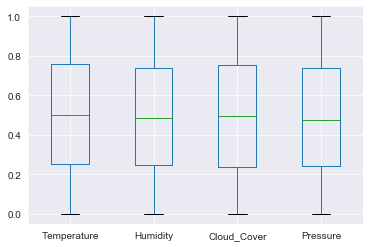

In [112]:
New_scaled.boxplot()

## splitting the data for training purposes 

In [113]:
x_train, x_test, y_train, y_test = train_test_split(New_scaled, Rain_numeric_test, test_size=0.2, random_state=42)
print(x_train)

      Temperature  Humidity  Cloud_Cover  Pressure
2055     0.000000  0.689312     0.298772  0.766420
1961     0.964392  0.040566     0.941527  0.685669
1864     0.209585  0.743031     0.207024  0.946385
2326     0.286467  0.664045     0.559104  0.880115
461      0.379084  0.901632     0.522223  0.697655
...           ...       ...          ...       ...
1638     0.673115  0.881263     0.787913  0.846198
1095     0.759112  0.408803     0.679731  0.654200
1130     0.001991  0.008128     0.544449  0.251756
1294     0.024702  0.040087     0.791238  0.453619
860      0.937292  0.872624     0.556734  0.962570

[2000 rows x 4 columns]


## data set for the model

In [114]:
x_train.describe() 

,Temperature,Humidity,Cloud_Cover,Pressure
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.504120,0.490747,0.501386,0.486005
std,0.294427,0.286229,0.289392,0.288285
min,0.000000,0.000000,0.000000,0.000134
25%,0.253929,0.246795,0.248990,0.236312
50%,0.501517,0.483753,0.502291,0.474539
75%,0.766875,0.738352,0.752425,0.734381
max,1.000000,1.000000,1.000000,1.000000


In [115]:
x_test.describe() #rain numeric only the rain column

,Temperature,Humidity,Cloud_Cover,Pressure
count,500.000000,500.000000,500.000000,500.000000
mean,0.500164,0.490280,0.477037,0.506837
std,0.288293,0.280816,0.298219,0.289746
min,0.000591,0.001889,0.000103,0.000000
25%,0.259043,0.249652,0.202829,0.262552
50%,0.500000,0.490067,0.474223,0.489083
75%,0.730143,0.733654,0.753889,0.764301
max,0.999038,0.995768,0.996742,0.998314


In [116]:
print(y_train)

      Rain_Numeric
2055           0.0
1961           0.0
1864           0.0
2326           1.0
461            1.0
...            ...
1638           0.0
1095           0.0
1130           0.0
1294           0.0
860            0.0

[2000 rows x 1 columns]


In [117]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2000, 4), (500, 4), (2000, 1), (500, 1))

In [118]:
print(x_train)
print(x_test)
print(y_train)

      Temperature  Humidity  Cloud_Cover  Pressure
2055     0.000000  0.689312     0.298772  0.766420
1961     0.964392  0.040566     0.941527  0.685669
1864     0.209585  0.743031     0.207024  0.946385
2326     0.286467  0.664045     0.559104  0.880115
461      0.379084  0.901632     0.522223  0.697655
...           ...       ...          ...       ...
1638     0.673115  0.881263     0.787913  0.846198
1095     0.759112  0.408803     0.679731  0.654200
1130     0.001991  0.008128     0.544449  0.251756
1294     0.024702  0.040087     0.791238  0.453619
860      0.937292  0.872624     0.556734  0.962570

[2000 rows x 4 columns]
      Temperature  Humidity  Cloud_Cover  Pressure
1447     0.709165  0.038555     0.223765  0.407123
1114     0.441417  0.241998     0.560102  0.863320
1064     0.511284  0.575297     0.500666  0.607025
2287     0.901728  0.984584     0.971320  0.772202
1537     0.906661  0.234801     0.423989  0.012062
...           ...       ...          ...       ...
2375  

## Ensure y_train is in the correct format (1D array)

In [119]:
y_train = y_train.values.ravel()
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

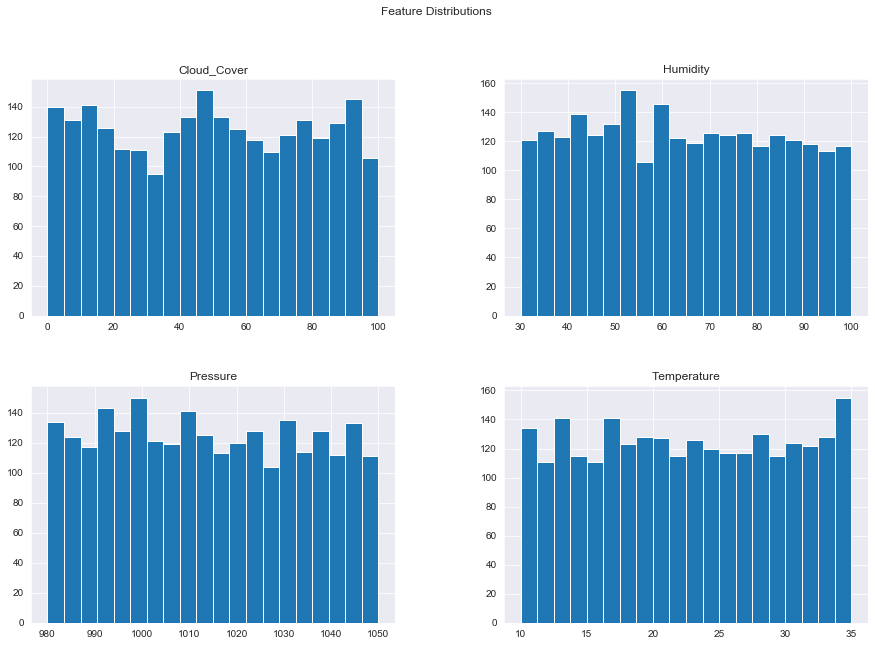

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for numerical features
dataset[['Temperature', 'Humidity', 'Cloud_Cover', 'Pressure']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

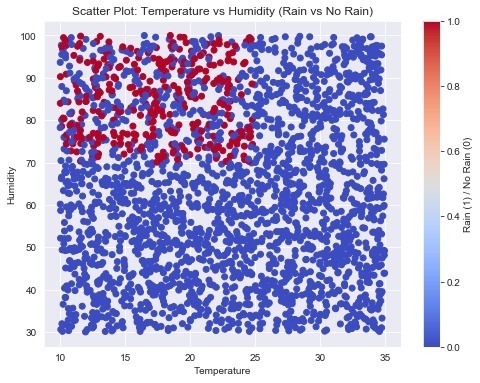

In [121]:
import matplotlib.pyplot as plt

# Select the two features for the scatter plot
x_feature = 'Temperature'
y_feature = 'Humidity'

# Create the scatter plot with color based on the 'Rain' column
plt.figure(figsize=(8, 6))
plt.scatter(dataset[x_feature], dataset[y_feature], c=dataset['Rain_Numeric'].apply(lambda x: 1 if x == 1 else 0), cmap='coolwarm')

# Label the axes and add a title
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f'Scatter Plot: {x_feature} vs {y_feature} (Rain vs No Rain)')

# Add a color bar to indicate what the colors represent
plt.colorbar(label='Rain (1) / No Rain (0)')

plt.show()


## Training a KNN model for the same exact data

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)  # Start with 5 neighbors
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

## Testing the model 

In [123]:
y_pred = knn.predict(x_test)

## Evaluating the KNN model, confusion matrix, f1 score, precision 

In [124]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.984
Confusion Matrix:
 [[440   3]
 [  5  52]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       443
         1.0       0.95      0.91      0.93        57

    accuracy                           0.98       500
   macro avg       0.97      0.95      0.96       500
weighted avg       0.98      0.98      0.98       500



In [125]:
k_values = [i for i in range (1,31)]
scores = []
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

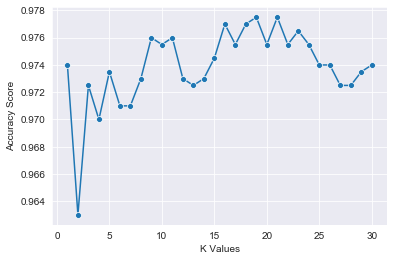

In [126]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

## Evaluate the random forest classfier model, confusion matrix, F1 score, precision

In [127]:
y_pred = model.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[443   0]
 [  1  56]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       443
         1.0       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500



In [128]:
print(accuracy_score(y_test.values,model.predict(x_test)))

0.998


In [129]:
y_pred = model.predict(x_test)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## saving the model for future use using PICKLE!

In [130]:
import pickle
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("RFC saved successfully!")
with open('trained_model_knn.pkl', 'wb') as file:
    pickle.dump(knn, file)
print("KNN saved successfully!")

RFC saved successfully!
KNN saved successfully!
